# Máquina oscilante
© 2020 Víctor A. Bettachini  
Mecánica General  
Departamento de Ingeniería e Investigación Tecnológica  
Universidad Nacional de La Matanza   
![](ambos.png "UNLaM | DIIT")  

---

## Enunciado
Los centros de los elementos $A$ y $B$ de masas $m = 5\,\mathrm{kg}$ y $M = 1\,\mathrm{kg}$ están unidos por una barra rígida de longitud $l = 2\,\mathrm{m}$. 
Otra barra idéntica conecta $O$ y $A$ obligando que $A$ sea equidistante de $O$ y $B$ en $\hat{I}$. 
El peso del elemento de masa $m$ debe tenerse en cuenta pues actúa $\vec{g}$. 
 
El elemento de masa $M$ está engarzado en un riel y solo puede moverse en $\hat{I}$.
Tal movimiento está afectado por el resorte de constante elástica $k = 30\,\mathrm{N\,m^{-1}}$ y del amortiguador cuya fuerza se opone a la velocidad con proporcionalidad $c = 0.5\,\mathrm{N\,m^{-1}\,s}$.

![Sistema oscilante amortiguado](mitDva.png)

1. Construya el Lagrangiano y obtenga la ecuación de Euler-Lagrange.
1. Genere una gráfica de la coordenada y velocidad generalizada.
1. ¿Qué pasa con $m$ si se usa un resorte más débil, $k = 10\,\mathrm{N\,m^{-1}}$?
1. ¿Qué cambia en el movimiento de $M$ si se usa un amortiguador más fuerte, $c = 1.5\,\mathrm{N\,m^{-1}\,s}$?

## Resolución simbólica en el formalismo Lagrangiano

In [1]:
# biblioteca de cálculo simbólico
import sympy as sym
import sympy.physics.mechanics as mech
mech.init_vprinting() # notación con puntos para derivadas temporales

### Variables

In [2]:
# Parámetros físicos del sistema
m, M, g, l, c, k = sym.symbols('m, M, g, l, c, k', positive=True)

# Coordenadas generalizadas 
t = sym.symbols('t') # tiempo, todo es función del tiempo
theta = sym.Function('theta')(t)

In [3]:
# Sistema cartesiano
N = sym.physics.vector.ReferenceFrame('N') # marco referencial N en coordenadas cartesianas

# posiciones
m_r = l * (sym.cos(theta)* N.x + sym.sin(theta)* N.y)
M_r = 2* l* sym.cos(theta)* N.x

### Energía cinética

In [4]:
# velocidades
m_v = m_r.diff(t,N) # derivada respecto a t en el marco referencial N
M_v = m_r.diff(t,N)

# energía cinética
unMedio = sym.Rational(1,2) # Rational: fracción de enteros
m_T = unMedio* m* m_v.dot(m_v)
M_T = unMedio* M* M_v.dot(M_v)
T = m_T + M_T

cineticaSimbolo = sym.Symbol('T')
sym.Eq(cineticaSimbolo, T.simplify() ) # simplify: simplifica usando factor común y otras operaciones

### Energía potencial

Para el cálculo de energía potencial elástica del resorte $\frac{k}{2} (l - l_0)^2$ considero que su longitud de reposo del resorte puede aproximarse por nula $l_0 \simeq 0$.

In [5]:
# Energía potencial
m_V = m* g* m_r.dot(N.y) # potencial gravitatorio
M_V = unMedio* k* M_r.dot(N.x)**2 # potencial del resorte
V = m_V + M_V
potencialSimbolo = sym.Symbol('V')
sym.Eq(potencialSimbolo, V.simplify() )

### Lagrangiano
$$
L(x,\dot{x}) = T(\dot{x})- V(x)
$$

In [6]:
L = T-V
lagrangianoSimbolo = sym.Symbol('\mathcal{L}')
sym.Eq(lagrangianoSimbolo, L.simplify() )

### Ecuaciones de Euler-Lagrange

Primero calculamos el que tiene derivada total respecto al tiempo
$$\frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{q_i}} \mathcal{L}$$

In [7]:
L.diff( theta.diff(t) )

In [8]:
theta_dt = L.diff( theta.diff(t) ).diff(t)
theta_dt

In [9]:
theta_dt.simplify()

Luego el que deriva respecto a la coordenada generalizada
$$
\frac{\partial}{\partial q_i} \mathcal{L}
$$

In [10]:
theta_dq = L.diff( theta )
theta_dq.simplify()

### Funciones de vínculo

Habría que obtener los
$$
\sum_j \lambda_j \frac{\partial f_j}{\partial q_i}
$$
más no hay ninguno.

In [11]:
theta_lam = 0

### Fuerzas no conservativas

Para calcular la fuerza generalizada utilizaré el camino de la derivar la posición del punto de aplicación de las fuerzas no conservativas respecto a las coordenadas generalizadas:
$$
Q_i \delta q_i = \sum_j F_j \left( \frac{\partial r_j}{\partial q_j} \right) \delta q_j,
$$

Aquí actua la fuerza de amortiguación
$$
\vec{F}_\text{amortiguación} = - c \dot{x}_M \hat{I}
$$
aplicada sobre
$$
\vec{r}_B = x_M \hat{I}
$$
entonces
$$
Q_\theta \delta \theta = \left( - c \dot{x}_M \hat{I} \right) \left( \frac{\partial r_j}{\partial q_j} \right) \delta \theta
= \left( - c \dot{x}_M \hat{I} \right) \left( \frac{\partial x_M}{\partial \theta } \right) \delta \theta
= \left( - c \dot{x}_M \hat{I} \right) \left( - 2 l \sin{\theta} \hat{I} \right) \delta \theta
$$
con lo que determina que 
$$
Q_\theta = 2 c l \dot{x}_M \sin{(\theta)} = - 4 c l^2 \sin^2{(\theta)} \dot{\theta}
$$

In [12]:
F_noCons = - c * M_r.dot(N.x).diff(t)
theta_Q = F_noCons* M_r.dot(N.x).diff(theta)
theta_Q

### Ecuaciones de Euler-Lagrange
$$
\frac{\partial}{\partial q_i} L
- \frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{q}_i} L
+ \sum_j \lambda_j \frac{\partial f_j}{\partial q_i}
+ Q_i
= 0
$$

In [13]:
theta_el = sym.Eq( theta_dq - theta_dt + theta_lam + theta_Q, 0) # ecuación igualando a cero
theta_el.simplify()

## Resolución numérica

Utilizaremos un esquema de Euler en que se actualiza un el estado del sistema $y(t_n) = y_n$ cada cortos intervalos tiempo $\Delta h = t_{n+1} - t_n$

$$
y_{n+1} = y_n + \dot{y}_n(t_n) \Delta h
$$
usando una estimación de las velocidades $\dot{y}_n(t_n)$ en el intervalo anterior.

No se dispone de una expresión de $\dot{y}(t)$, pero si de las aceleraciones generalizadas fruto de la  ecuaciones de Euler-Lagrange.
Realizando una integración numérica de estas aceleraciones se obtienen las velocidades.

Entonces de estas ecuaciones diferenciales lineales homogéneas de segundo orden se necesita despejar la aceleración.

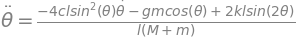

In [14]:
ypp_solve = list( sym.solveset(theta_el, theta.diff(t,2)) )[0] # primer elemento de la lista en que se convirtió el set
sym.Eq(theta.diff(t,2), ypp_solve)

Como utilizamos un método de resolución basado en una integración no podemos pasar de la aceleración directamente a la posición en función del tiempo.
La integración nos dará la velocidad y una integración sucesiva de la misma la posición.

Registro las magnitudes físicas del sistema.

In [153]:
# escribo los valores numéricos en variables
g_val = 9.81 # [m s-2]
m_val = 5 # [kg]
M_val = 1 # [kg]
l_val = 2 # [m]
k_val = 30 # [N m-1]
c_val = 0.5 # [N m-1 s]
 
# un diccionario (un tipo de variable Python) fácilará el reemplazar con valores numéricos
valores = {
    g : g_val,
    m : m_val,
    M : M_val,
    l : l_val,
    k : k_val,
    c : c_val
}

Genero la función `aThetaNumerica` con dos variables $(\theta, \dot{\theta})$

In [154]:
aThetaNumerica = sym.lambdify([theta, theta.diff(t)], ypp_solve.subs(valores))

La ensayo, si $\theta= 0$ y $\dot{\theta}=0$ debiera darnos $-\frac{g m}{l (M+m)}$

In [155]:
aThetaNumerica(0,0), -(g_val* m_val)/(l_val*(M_val+ m_val))

¡Perfecto!

Por esto escribimos la ecuación de segundo orden como dos de primer orden resolubles con el esquema de Euler.
Si notamos $y_0$ la posición $y_1$ la derivada primera, la velocidad, e $y_2$ la segunda derivada o aceleración

$$
\left\{
\begin{array}{l}
\dot{y}_0 = y_1 \\
\dot{y}_1 = \ddot{y}_0 = \ddot{\theta}(\theta, \dot{\theta}) \\
\end{array}
\right.
$$

In [156]:
# defino una función con el sistema de derivadas
# t : no se usa en este sistema pero lo dejamos para uso posterior
# y : lista de estado con [y_0, y_1]
# y[0]: coordenada generalizada
# y[1]: velocidad generalizada
# dydt : lista de derivadas
def derivaday(t, y):
    dydt = [y[1], aThetaNumerica(y[0],y[1])]
    return dydt

In [157]:
# biblioteca de cálculo numérico general
import numpy as np

In [158]:
# biblioteca de cálculo científico: eficientes herramientas de cálculo numérico
from scipy.integrate import solve_ivp

### Corrida de simulación a partir de parámetros iniciales

Previo a la corrida de la simulación se definen condiciones iniciales del sistema y el rango de tiempo a analizar 

In [159]:
# parámetros para inicial las integración de sistemaDerivadas
t_inicial = 0 # [s]
t_final = 20 # [s]
t_paso = 0.01 # [s]
t_rango = np.arange(t_inicial, t_final, t_paso)
y_inicial = [np.pi/6.0, 0] # parte del reposo en theta = 30 grados (pi/6)

In [160]:
# Integra de a pasos en el tiempo
sol_y = solve_ivp(derivaday, (t_rango[0], t_rango[-1] ), y_inicial, t_eval = t_rango)

## Graficación

In [161]:
# biblioteca de graficación
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [162]:
def graficaFuncion(solucion, nombreCoordenada='q'):
    fig, ax = plt.subplots(nrows= 1, ncols= 2, squeeze=False, figsize=(12, 4)) # dos figuras en la misma fila
    fig.suptitle('Integración numérica para $'+ nombreCoordenada + '$', fontsize=16)
    ax[0,0].plot(solucion.t, solucion.y[0]) # posición
    ax[0,0].set(xlabel='t [s]', ylabel = '$' + nombreCoordenada+ '$ [rad]', title='Posición')
    ax[0,1].plot(solucion.t, solucion.y[1]) # velocidad
    ax[0,1].set(xlabel='t [s]', ylabel = '$\dot{' + nombreCoordenada + '}$ [rad/s]', title='Velocidad')

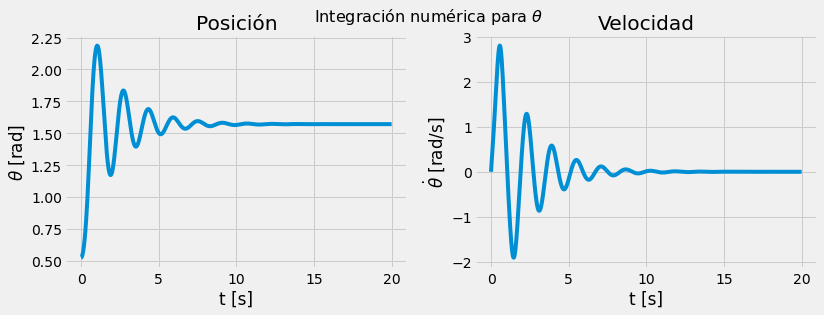

In [163]:
graficaFuncion(sol_y, nombreCoordenada = r'\theta')